In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2025-01-08 18:13:25.928070: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-08 18:13:26.084031: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-08 18:13:26.261858: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736370806.452169  220762 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736370806.500682  220762 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-08 18:13:26.884032: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

### Data Preparation

In [69]:
train = '../../data/processed/train.csv'
test = '../../data/processed/test.csv'

X, y = pd.read_csv(train), pd.read_csv(test)

In [29]:
print('X (shape): ', X.shape)
print('y (shape): ', y.shape)

X (shape):  (282872, 16)
y (shape):  (282872, 1)


In [70]:
X.columns

Index(['latitude', 'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM',
       'livingRooms', 'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
       'rentEstimate_upperPrice', 'saleEstimate_lowerPrice',
       'saleEstimate_currentPrice', 'saleEstimate_upperPrice',
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange', 'history_percentageChange',
       'history_numericChange'],
      dtype='object')

In [71]:
X = X.drop(columns=['saleEstimate_valueChange.percentageChange', 'history_percentageChange'])

In [72]:
y['history_price'].std()

np.float64(1263486.0699584687)

<Axes: ylabel='Frequency'>

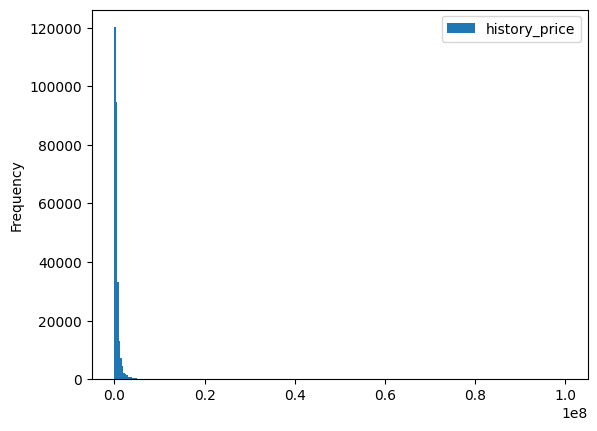

In [73]:
y.plot(kind='hist', bins=300)

In [74]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [75]:
print(X_train.shape)
print(X_valid.shape)


(226297, 14)
(56575, 14)


In [76]:
print('X_train is Nan?\n', np.isnan(X_train).any())
print('\n\ny_train is Nan?\n', np.isnan(y_train).any())

X_train is Nan?
 latitude                                  False
longitude                                 False
bathrooms                                  True
bedrooms                                   True
floorAreaSqM                               True
livingRooms                                True
rentEstimate_lowerPrice                    True
rentEstimate_currentPrice                  True
rentEstimate_upperPrice                    True
saleEstimate_lowerPrice                    True
saleEstimate_currentPrice                  True
saleEstimate_upperPrice                    True
saleEstimate_valueChange.numericChange     True
history_numericChange                      True
dtype: bool


y_train is Nan?
 history_price    False
dtype: bool


In [33]:
print('X_train is Nan?\n', np.isinf(X_train).any())
print('\n\ny_train is Nan?\n', np.isinf(y_train).any())

X_train is Nan?
 latitude                                     False
longitude                                    False
bathrooms                                    False
bedrooms                                     False
floorAreaSqM                                 False
livingRooms                                  False
rentEstimate_lowerPrice                      False
rentEstimate_currentPrice                    False
rentEstimate_upperPrice                      False
saleEstimate_lowerPrice                      False
saleEstimate_currentPrice                    False
saleEstimate_upperPrice                      False
saleEstimate_valueChange.numericChange       False
saleEstimate_valueChange.percentageChange    False
history_percentageChange                     False
history_numericChange                        False
dtype: bool


y_train is Nan?
 history_price    False
dtype: bool


In [77]:
X_train = X_train.fillna(X_train.mean())
X_valid = X_valid.fillna(X_valid.mean())

In [78]:
print('X_train is NaN?\n', np.isnan(X_train).any())

X_train is NaN?
 latitude                                  False
longitude                                 False
bathrooms                                 False
bedrooms                                  False
floorAreaSqM                              False
livingRooms                               False
rentEstimate_lowerPrice                   False
rentEstimate_currentPrice                 False
rentEstimate_upperPrice                   False
saleEstimate_lowerPrice                   False
saleEstimate_currentPrice                 False
saleEstimate_upperPrice                   False
saleEstimate_valueChange.numericChange    False
history_numericChange                     False
dtype: bool


In [79]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)

In [81]:
X_train.shape[1:]

(14,)

### Model

In [82]:
input_layer = tf.keras.layers.Input(shape=X_train.shape[1:])
h1 = tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01))(input_layer)
h2 = tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01))(h1)
h3 = tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01))(h2)
h4 = tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01))(h3)
h5 = tf.keras.layers.Dense(70, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01))(h4)
h6 = tf.keras.layers.Dense(70, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01))(h5)
concat = tf.keras.layers.concatenate([input_layer, h6])
output_layer = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])

In [83]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 14)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 50)        │        750 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 50)        │      2,550 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 50)        │      2,550 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 50)        │      2,550 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 70)        │      3,570 │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 70)        │      4,970 │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 84)        │          0 │ input_layer_2[0]… │
│ (Concatenate)       │                   │            │ dense_19[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 1)         │         85 │ concatenate_2[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae', 'mse']
)

In [85]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'model.keras',
    save_best_only=True
)

In [86]:
from gc import callbacks

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    callbacks=[checkpoint],
    validation_data=(X_valid,y_valid),
    batch_size=32
)

Epoch 1/50


/home/juanvieira/local/real-estate-dl/env/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18']
Received: inputs=Tensor(shape=(None, 14))
  warnings.warn(msg)


7072/7072 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 1367739990016.0000 - mae: 458245.9688 - mse: 1367739990016.0000 - val_loss: 983594172416.0000 - val_mae: 308872.4688 - val_mse: 983594172416.0000
Epoch 2/50
7072/7072 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 757470068736.0000 - mae: 296334.7188 - mse: 757470068736.0000 - val_loss: 603076558848.0000 - val_mae: 268533.9375 - val_mse: 603076558848.0000
Epoch 3/50
7072/7072 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 448592642048.0000 - mae: 263615.4375 - mse: 448592642048.0000 - val_loss: 453559320576.0000 - val_mae: 256672.0781 - val_mse: 453559320576.0000
Epoch 4/50
7072/7072 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 414585815040.0000 - mae: 254209.2188 - mse: 414585815040.0000 - val_loss: 416081412096.0000 - val_mae: 253716.2812 - val_mse: 416081412096.0000
Epoch 5/50
7072/7072 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 402769674240.0000 - mae: 252593.7188 - mse: 402769674240.0000 - val_loss: 414335008768.0000 - val_mae: 252855.1250 - v

In [206]:
y_pred = model.predict(X_valid)

 241/1768 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step

/home/juanvieira/local/real-estate-dl/env/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_146']
Received: inputs=Tensor(shape=(32, 16))



1768/1768 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step


### Visualizations

In [207]:
y_valid_flat = np.squeeze(y_valid)
y_pred_flat = np.squeeze(y_pred)

data = pd.DataFrame({
    'Actual': y_valid_flat,
    'Predicted': y_pred_flat,
    'Absolute Error': np.abs(y_valid_flat - y_pred_flat)
})

#### Erro Absoluto

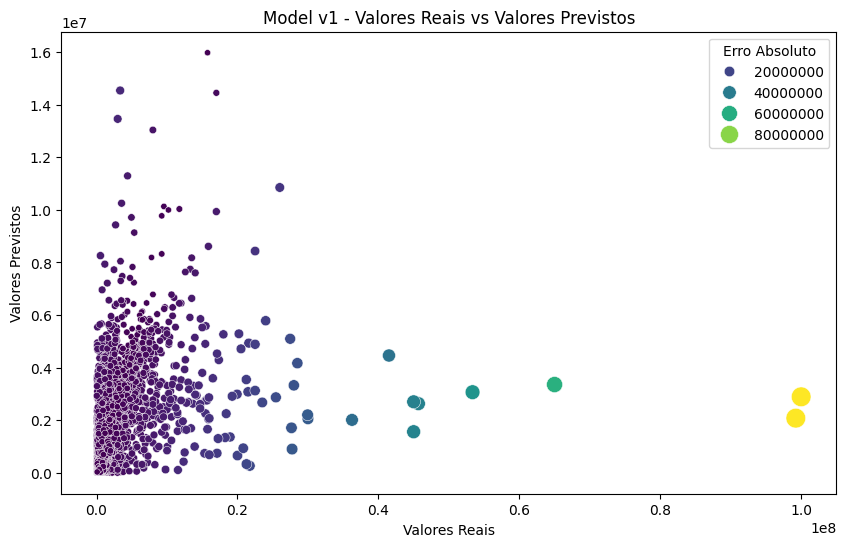

In [139]:
# MODEL VERSION: V1
# LAYERS/NEURONS: 2, 10
# LEARNING RATE: 0.0001

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Actual', y='Predicted', hue='Absolute Error', palette='viridis', size='Absolute Error', sizes=(20, 200))

plt.title('Model v1 - Valores Reais vs Valores Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')

plt.legend(title='Erro Absoluto')
plt.show()

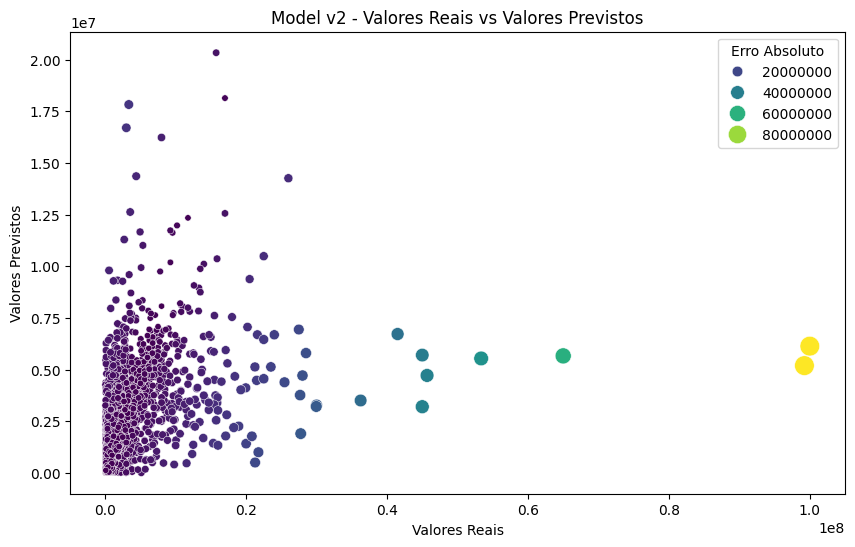

In [149]:
# MODEL VERSION: V2
# LAYERS/NEURONS: 2, 30
# LEARNING RATE: 0.0001

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Actual', y='Predicted', hue='Absolute Error', palette='viridis', size='Absolute Error', sizes=(20, 200))

plt.title('Model v2 - Valores Reais vs Valores Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')

plt.legend(title='Erro Absoluto')
plt.show()

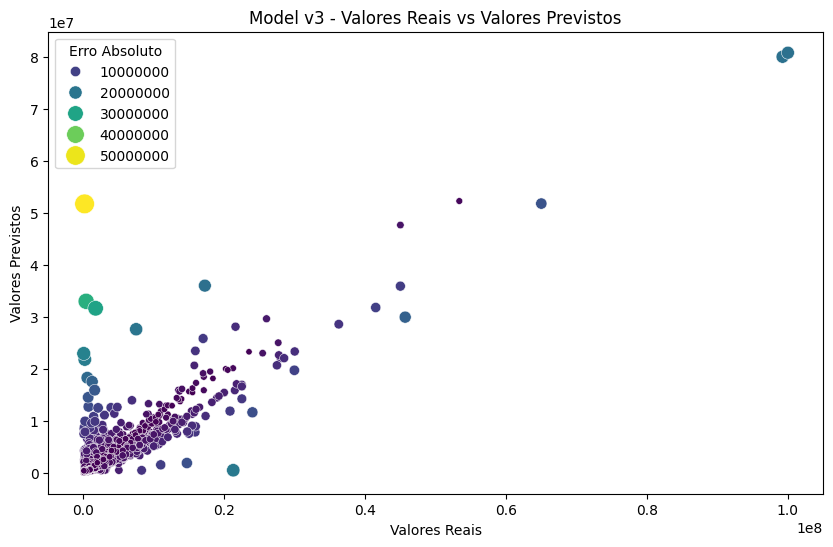

In [158]:
# MODEL VERSION: V3
# LAYERS/NEURONS: 6, 30
# LEARNING RATE: 0.001

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Actual', y='Predicted', hue='Absolute Error', palette='viridis', size='Absolute Error', sizes=(20, 200))

plt.title('Model v3 - Valores Reais vs Valores Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')

plt.legend(title='Erro Absoluto')
plt.show()

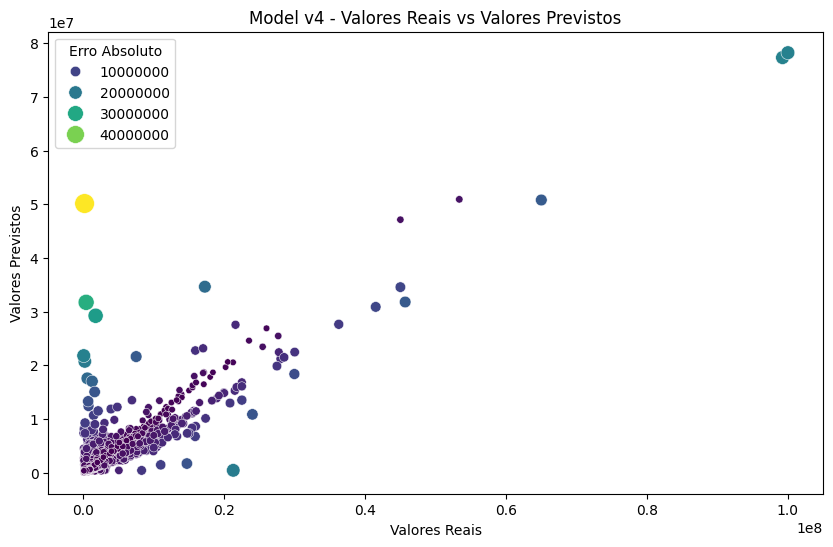

In [167]:
# MODEL VERSION: V4
# LAYERS/NEURONS: 6, 60
# LEARNING RATE: 0.001

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Actual', y='Predicted', hue='Absolute Error', palette='viridis', size='Absolute Error', sizes=(20, 200))

plt.title('Model v4 - Valores Reais vs Valores Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')

plt.legend(title='Erro Absoluto')
plt.show()

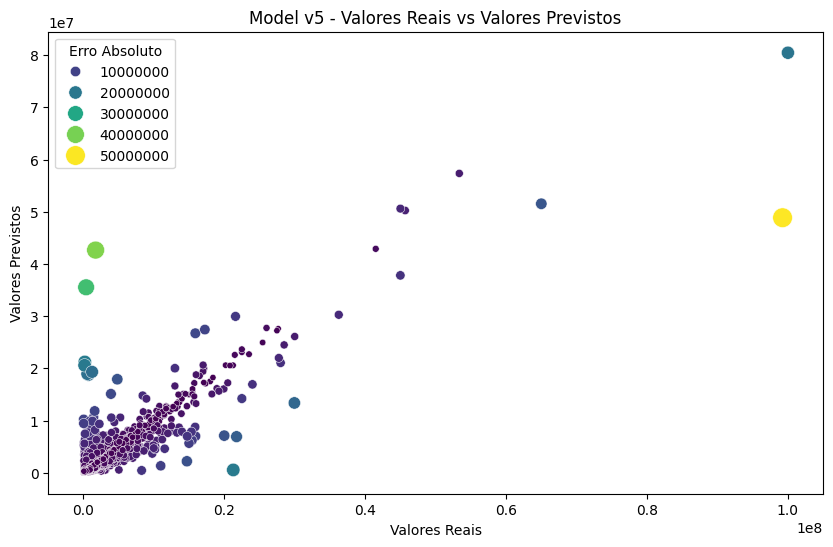

In [181]:
# MODEL VERSION: V5
# LAYERS/NEURONS: 10, 50
# LEARNING RATE: 0.001

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Actual', y='Predicted', hue='Absolute Error', palette='viridis', size='Absolute Error', sizes=(20, 200))

plt.title('Model v5 - Valores Reais vs Valores Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')

plt.legend(title='Erro Absoluto')
plt.show()

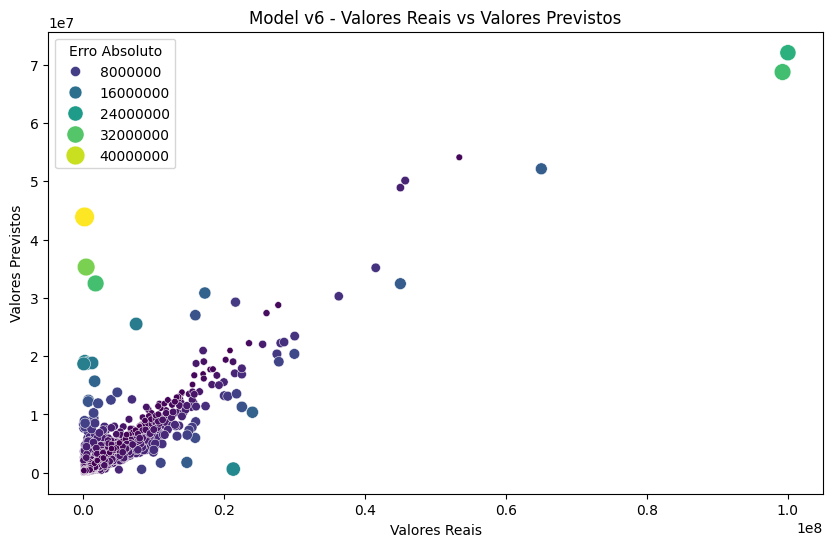

In [199]:
# MODEL VERSION: V6
# LAYERS/NEURONS: 6, 100, 100, 100, 100, 100, 300
# LEARNING RATE: 0.0001

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Actual', y='Predicted', hue='Absolute Error', palette='viridis', size='Absolute Error', sizes=(20, 200))

plt.title('Model v6 - Valores Reais vs Valores Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')

plt.legend(title='Erro Absoluto')
plt.show()

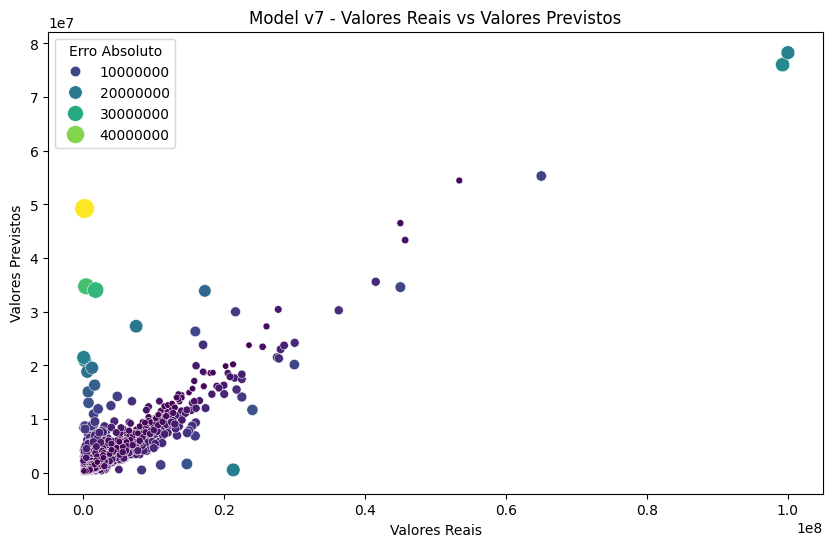

In [208]:
# MODEL VERSION: V7
# LAYERS/NEURONS: 6, 50, 50, 50, 50, 70, 70
# LEARNING RATE: 0.0001

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Actual', y='Predicted', hue='Absolute Error', palette='viridis', size='Absolute Error', sizes=(20, 200))

plt.title('Model v7 - Valores Reais vs Valores Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')

plt.legend(title='Erro Absoluto')
plt.show()

#### Curva do Gradiente

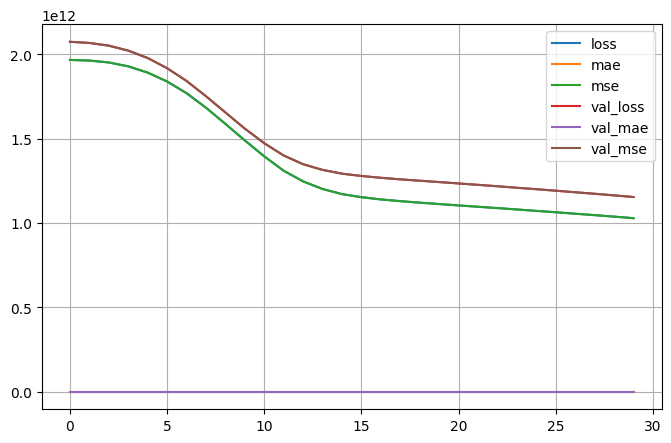

In [150]:
# MODEL VERSION: V2
# LAYERS/NEURONS: 2, 30
# LEARNING RATE: 0.0001

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

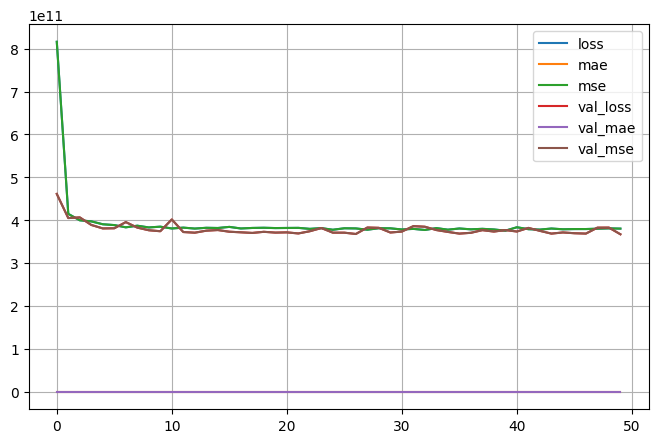

In [159]:
# MODEL VERSION: V3
# LAYERS/NEURONS: 6, 30
# LEARNING RATE: 0.001

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

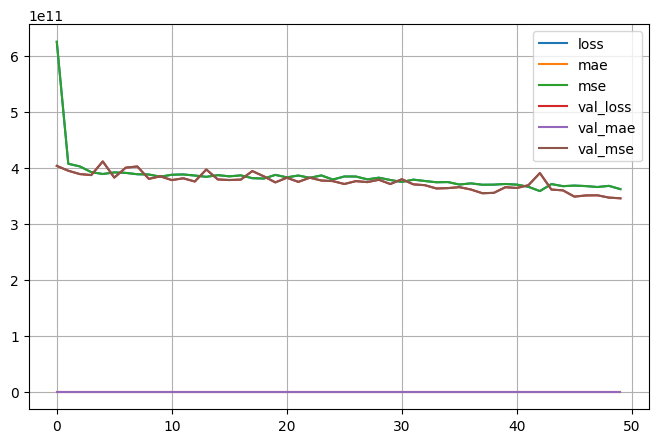

In [168]:
# MODEL VERSION: V4
# LAYERS/NEURONS: 6, 60
# LEARNING RATE: 0.001

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

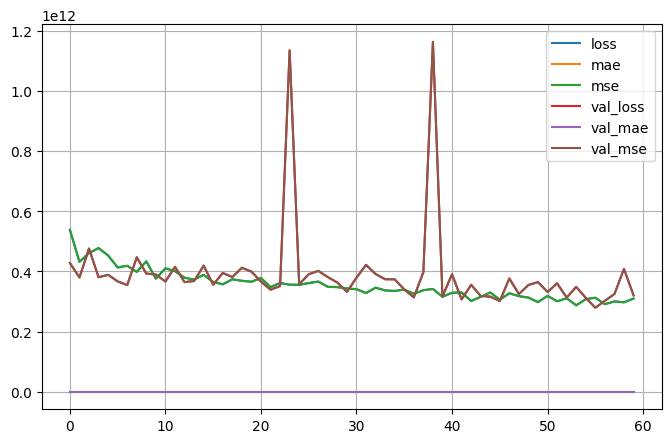

In [182]:
# MODEL VERSION: V5
# LAYERS/NEURONS: 10, 50
# LEARNING RATE: 0.001

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

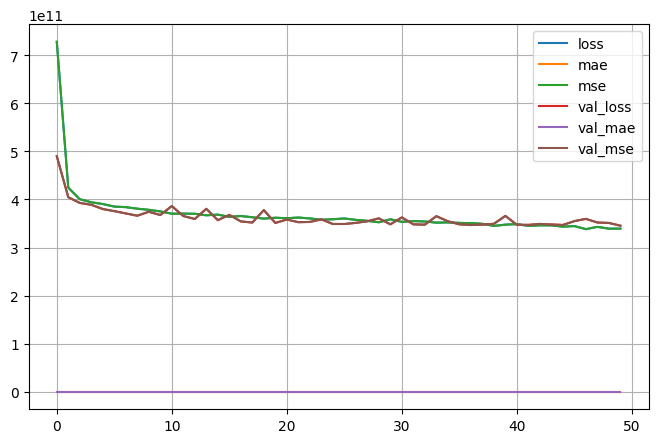

In [200]:
# MODEL VERSION: V6
# LAYERS/NEURONS: 6, 100, 100, 100, 100, 100, 300
# LEARNING RATE: 0.0001

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

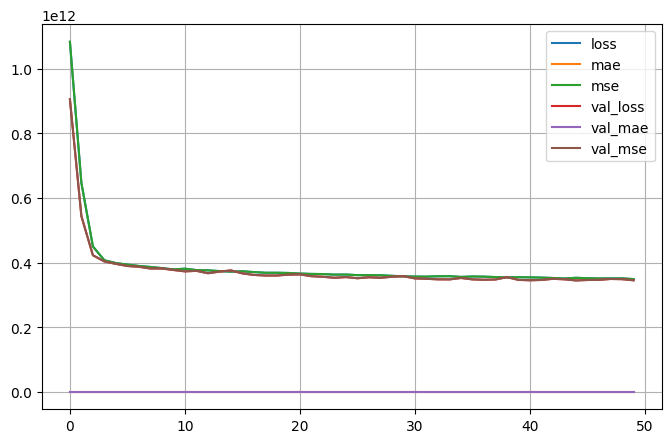

In [209]:
# MODEL VERSION: V7
# LAYERS/NEURONS: 6, 50, 50, 50, 50, 70, 70
# LEARNING RATE: 0.0001

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

### Others

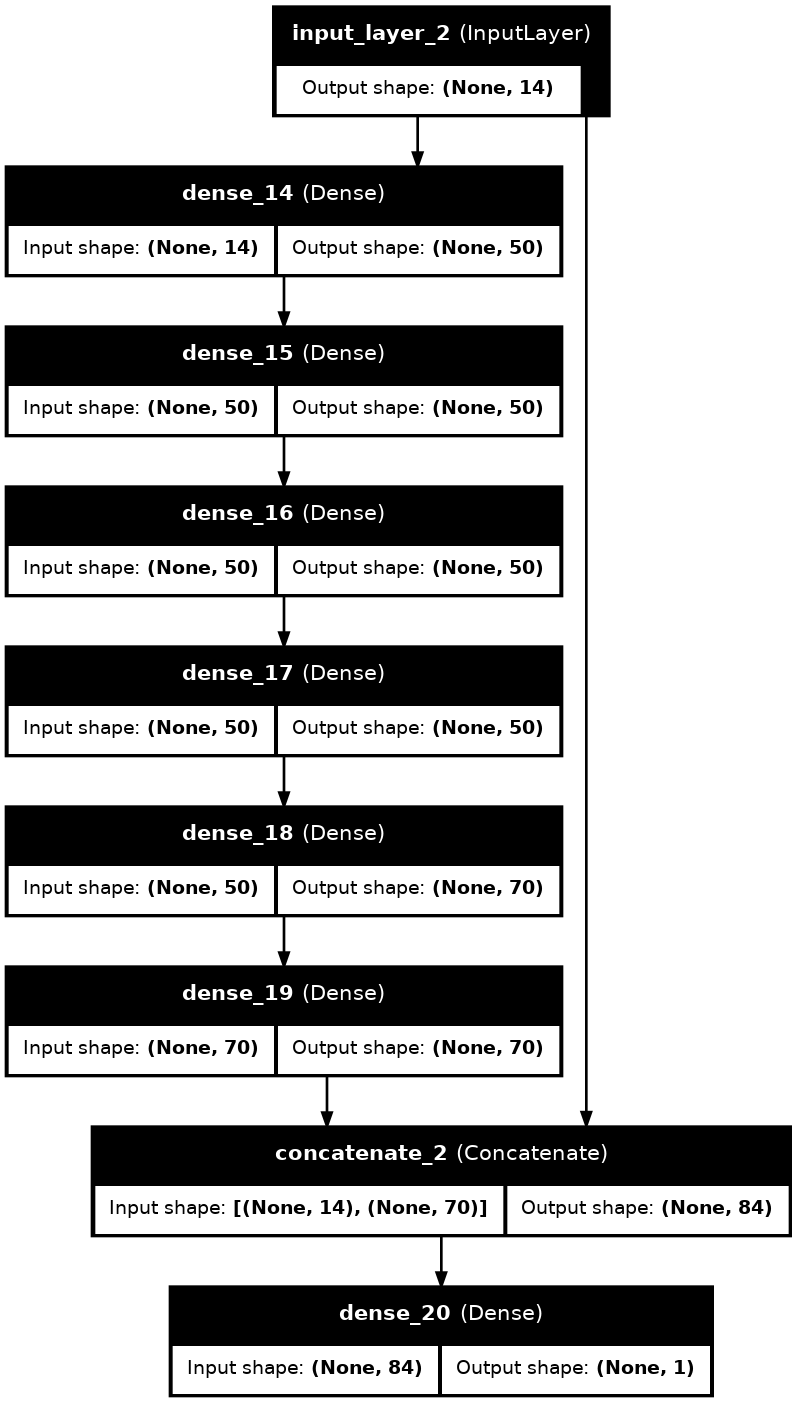

In [88]:
tf.keras.utils.plot_model(
    model,                                             
    to_file='best-nn.png',
    show_shapes=True,                                               # Formas dos tensores
    show_layer_names=True,                                          # Nomes das camadas
    expand_nested=False,                                            # Não expande camadas aninhadas
    dpi=96                                                          # Ajuste de Resolução
)